# Exploratory Data Analysis

In [22]:
# Import packages
import os
import re
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from PIL import Image
from collections import Counter
from nltk.corpus import stopwords

## Load data

In [23]:
# Load data
def parse_input(x):
    if os.path.exists("./data/reports/%s.xml" % x):
        f = open("./data/reports/%s.xml" % x, "r")
        soup = BeautifulSoup(f, 'html.parser')
        reports = soup.find(label='IMPRESSION').get_text().lower()
        return re.sub(r'[\W]', ' ', reports)

image = pd.Series(os.listdir('./data/images'))
number = image.apply(lambda x: x.split('_')[0][3:])
report = number.apply(parse_input)

In [24]:
df = pd.DataFrame({"Image": image, "Number": number, "Caption": report}).dropna().sort_values(['Number']).reset_index(drop=True)
df.head()

,Image,Number,Caption
0,CXR1_1_IM-0001-4001.png,1,normal chest x xxxx
1,CXR1_1_IM-0001-3001.png,1,normal chest x xxxx
2,CXR10_IM-0002-2001.png,10,no acute cardiopulmonary process
3,CXR10_IM-0002-1001.png,10,no acute cardiopulmonary process
4,CXR100_IM-0002-2001.png,100,no active disease


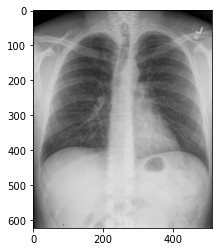

no acute cardiopulmonary abnormalities 



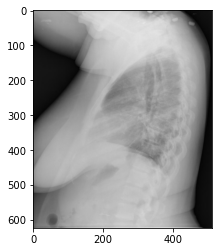

1  vascular congestion and diffuse interstitial edema 2  stable cardiomegaly 3  low lung volumes



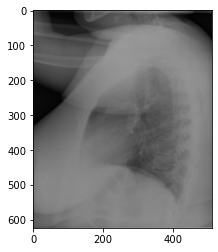

no acute cardiopulmonary abnormality 



In [25]:
for i in range(3):
    file_name = np.random.choice(df.Image)
    img = Image.open('./data/images/' + file_name)
    plt.imshow(img)
    plt.show()
    print(df[df.Image == file_name].Caption.item())
    print()

## Visualization

In [26]:
texts = functools.reduce(lambda a, b: a+b, df.Caption).split()
texts = [i for i in texts if i not in set(stopwords.words('english'))]
words_counter = Counter(texts)

In [27]:
words_counter.most_common()

[('acute', 4503),
 ('cardiopulmonary', 3151),
 ('xxxx', 2173),
 ('disease', 1974),
 ('abnormality', 1591),
 ('1', 1485),
 ('right', 1111),
 ('normal', 976),
 ('pulmonary', 952),
 ('left', 923),
 ('findings', 771),
 ('lungs', 765),
 ('2', 764),
 ('chest', 715),
 ('clear', 704),
 ('active', 685),
 ('pleural', 680),
 ('lung', 656),
 ('process', 640),
 ('size', 638),
 ('heart', 634),
 ('evidence', 603),
 ('atelectasis', 541),
 ('stable', 538),
 ('effusion', 476),
 ('cardiomegaly', 443),
 ('airspace', 399),
 ('abnormalities', 390),
 ('lobe', 376),
 ('mild', 363),
 ('edema', 339),
 ('mediastinal', 331),
 ('without', 323),
 ('may', 314),
 ('focal', 314),
 ('within', 304),
 ('limits', 293),
 ('upper', 292),
 ('pneumothorax', 289),
 ('effusions', 282),
 ('radiographic', 279),
 ('pneumonia', 265),
 ('negative', 256),
 ('consolidation', 254),
 ('identified', 254),
 ('changes', 247),
 ('opacities', 245),
 ('small', 245),
 ('lower', 238),
 ('bilateral', 234),
 ('interstitial', 224),
 ('basilar', 21